Fantastic yeasts and where to find them: the hidden diversity of dimorphic fungal pathogens;

An analysis of the forces required to drag sheep over various surfaces; 

Correlation of continuous cardiac output measured by a pulmonary artery catheter versus impedance cardiography in ventilated patients

In [37]:
import pandas as pd


In [38]:
data = pd.read_csv("/Users/haha/Desktop/istherecorrelation.csv", sep=";", decimal=",")
data

,Year,WO [x1000],NL Beer consumption [x1000 hectoliter]
0,2006,205.9,11402
1,2007,208.6,11492
2,2008,212.7,11450
3,2009,220.5,11502
4,2010,233.2,11474
5,2011,242.4,11480
6,2012,245.4,11452
7,2013,241.4,11484
8,2014,250.2,11555
9,2015,255.7,11601


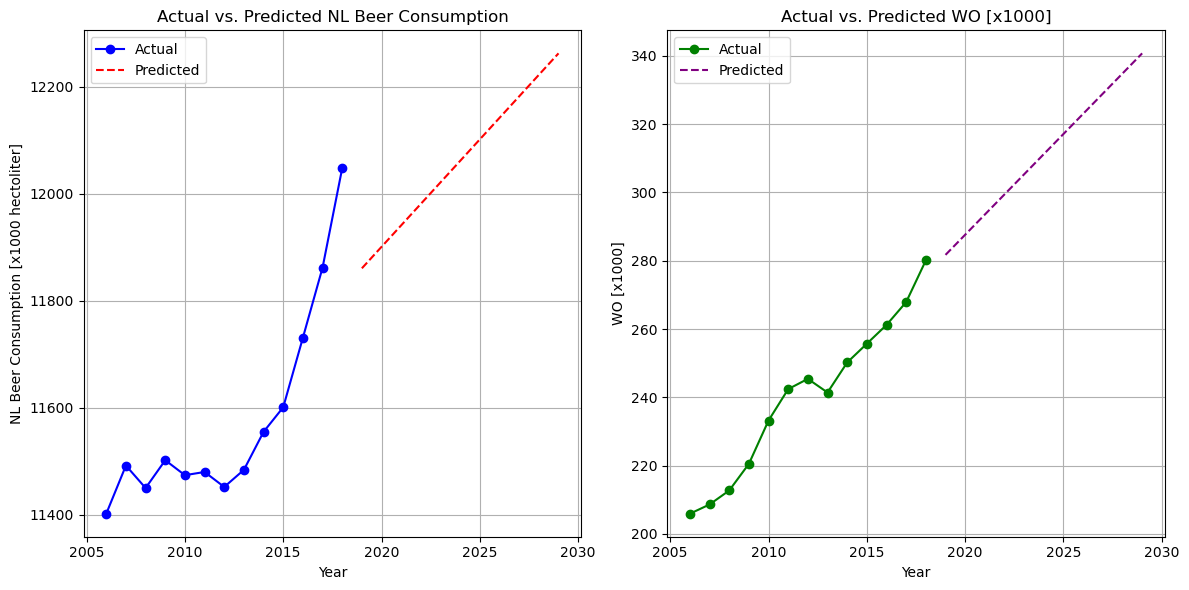

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# data
years = np.array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])
beer_consumption = np.array([11402, 11492, 11450, 11502, 11474, 11480, 11452, 11484, 11555, 11601, 11731, 11862, 12048])
wo = np.array([205.9, 208.6, 212.7, 220.5, 233.2, 242.4, 245.4, 241.4, 250.2, 255.7, 261.2, 267.9, 280.1])

# linear model
slope_beer, intercept_beer, _, _, _ = linregress(years, beer_consumption)
slope_wo, intercept_wo, _, _, _ = linregress(years, wo)

# predict future value
future_years = np.arange(2019, 2030)  # future 10 years
predicted_beer = slope_beer * future_years + intercept_beer
predicted_wo = slope_wo * future_years + intercept_wo

# 创建数字可视化
plt.figure(figsize=(12, 6))

# consume
plt.subplot(1, 2, 1)
plt.plot(years, beer_consumption, label='Actual', marker='o', color='b')
plt.plot(future_years, predicted_beer, label='Predicted', linestyle='--', color='r')
plt.xlabel('Year')
plt.ylabel('NL Beer Consumption [x1000 hectoliter]')
plt.title('Actual vs. Predicted NL Beer Consumption')
plt.grid(True)
plt.legend()

# WO
plt.subplot(1, 2, 2)
plt.plot(years, wo, label='Actual', marker='o', color='g')
plt.plot(future_years, predicted_wo, label='Predicted', linestyle='--', color='purple')
plt.xlabel('Year')
plt.ylabel('WO [x1000]')
plt.title('Actual vs. Predicted WO [x1000]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('Actual_vs._Predicted_WO.png', dpi=300)
plt.show()


Two sub-figures showing the relationship between the value of beer consumption and staff WO in the Netherlands over time. The red dotted line indicates the predicted values for the future. This visualization allows you to see past trends and make predictions about future directions using a linear regression model. 

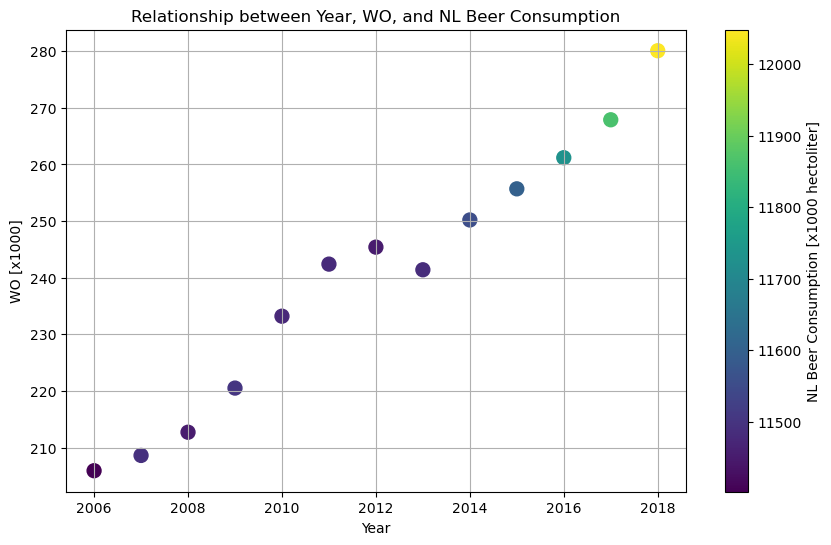

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
wo = [205.9, 208.6, 212.7, 220.5, 233.2, 242.4, 245.4, 241.4, 250.2, 255.7, 261.2, 267.9, 280.1]
beer_consumption = [11402, 11492, 11450, 11502, 11474, 11480, 11452, 11484, 11555, 11601, 11731, 11862, 12048]

# 创建散点图
plt.figure(figsize=(10, 6))
plt.scatter(years, wo, c=beer_consumption, cmap='viridis', s=100, marker='o')

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('WO [x1000]')
plt.title('Relationship between Year, WO, and NL Beer Consumption')

# 添加颜色映射
cbar = plt.colorbar()
cbar.set_label('NL Beer Consumption [x1000 hectoliter]')

plt.grid(True)
plt.savefig('NL_Beer_Consumption_[x1000_hectoliter].png', dpi=300)
plt.show()


3D Scatterplot to explore the how NL consumer value is and the change between these three factors.

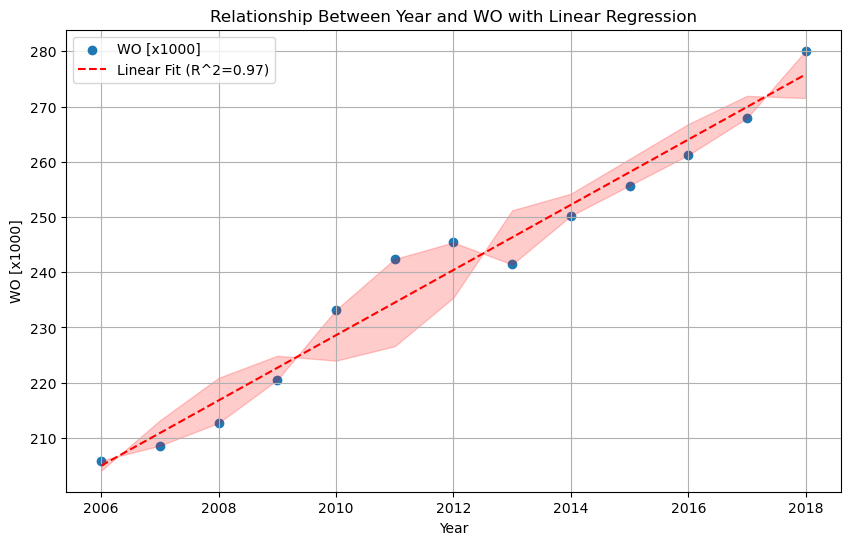

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# 数据
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
wo = [205.9, 208.6, 212.7, 220.5, 233.2, 242.4, 245.4, 241.4, 250.2, 255.7, 261.2, 267.9, 280.1]

# 创建线性回归模型
slope, intercept, r_value, p_value, std_err = linregress(years, wo)

# 生成拟合线的数据点
fit_line = [slope * year + intercept for year in years]

# 创建复杂图表
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制原始数据点
ax.scatter(years, wo, label='WO [x1000]', marker='o')

# 绘制拟合线
ax.plot(years, fit_line, label=f'Linear Fit (R^2={r_value**2:.2f})', color='red', linestyle='--')

# 添加误差带
y_pred = [slope * year + intercept for year in years]
residuals = [wo[i] - y_pred[i] for i in range(len(years))]
ax.fill_between(years, [y_pred[i] - residuals[i] for i in range(len(years))],
                [y_pred[i] + residuals[i] for i in range(len(years))],
                color='red', alpha=0.2)

# 添加标签和标题
plt.xlabel('Year')
plt.ylabel('WO [x1000]')
plt.title('Relationship Between Year and WO with Linear Regression')

# 添加图例
plt.legend()

plt.grid(True)

plt.savefig('Relationship_Between_Year_and_WO_with_Linear_Regression.png', dpi=300)
plt.show()



Linear regression to find the WO trend over time and R-squared value. The error - red part represent the data distribution and people can know more about the unertainty of the data.

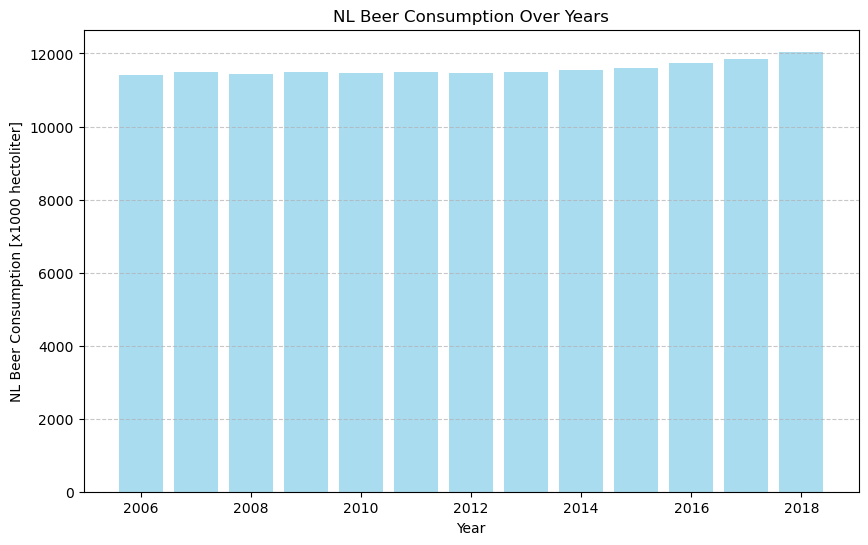

In [41]:
import matplotlib.pyplot as plt

# data
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
beer_consumption = [11402, 11492, 11450, 11502, 11474, 11480, 11452, 11484, 11555, 11601, 11731, 11862, 12048]

# graph
plt.figure(figsize=(10, 6))
plt.bar(years, beer_consumption, color='skyblue', alpha=0.7)

# label and other info
plt.xlabel('Year')
plt.ylabel('NL Beer Consumption [x1000 hectoliter]')
plt.title('NL Beer Consumption Over Years')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('NL_Beer_Consumption_Over_Years.png', dpi=300)

plt.show()


Dutch beer consumption seems to be increasing every year